In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
images=np.load('data.npy')
resized8=np.load('array8.npy')
%matplotlib inline

In [57]:
images=images[:200]
resized8=resized8[:200]
print(len(images))

200


In [59]:
import tensorflow.contrib.layers as lays
def generator(input,reuse=True):
    with tf.variable_scope('gen',reuse=reuse):
        net = lays.conv2d_transpose(input,16, [5, 5], stride=2, padding='SAME')
        net = lays.conv2d_transpose(net,32, [5, 5], stride=2, padding='SAME')
        net = lays.conv2d_transpose(net, 3, [5, 5], stride=1, padding='SAME', activation_fn=tf.nn.tanh)
        return net

In [60]:
batch_size=20
h=len(images)
num_batches=h//batch_size
init=tf.global_variables_initializer()
inputs_= tf.placeholder(tf.float32, (None,8, 8, 3))
G=generator(inputs_)

In [61]:
samples=[] #generator examples
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_batches):
        batch_z=resized8[i*batch_size : (i+1)*batch_size].reshape(batch_size,8,8,3)
        Go=sess.run(generator(inputs_,reuse=True),feed_dict={inputs_:batch_z})
        samples.append(Go)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

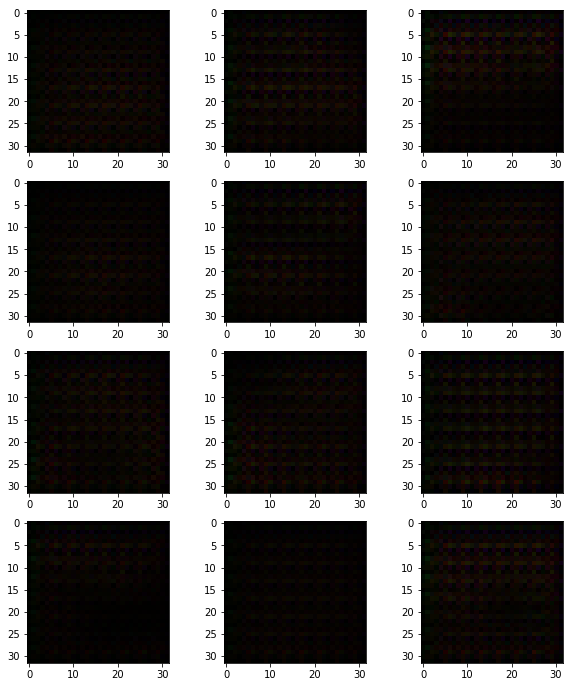

In [62]:
H=np.reshape(samples,(h,32,32,3))
fig=plt.figure(figsize=(10, 12))
columns = 3
rows = 4
for i in range(0, columns*rows ):
    #img = np.random.randint(10, size=(h,w))
    img=H[i]
    fig.add_subplot(rows, columns, (i+1))
    #plt.axis('off')
    plt.imshow(img)
plt.show()